<a href="https://colab.research.google.com/github/yuvarajgitcat/DiabetesPrediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


Data Collection and Analysis


> Diabetes Dataset



In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_excel("/content/drive/MyDrive/diabetes.xlsx")

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

0= no diabetes
1= diabetes

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome')

Y = diabetes_dataset['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Data Visualization

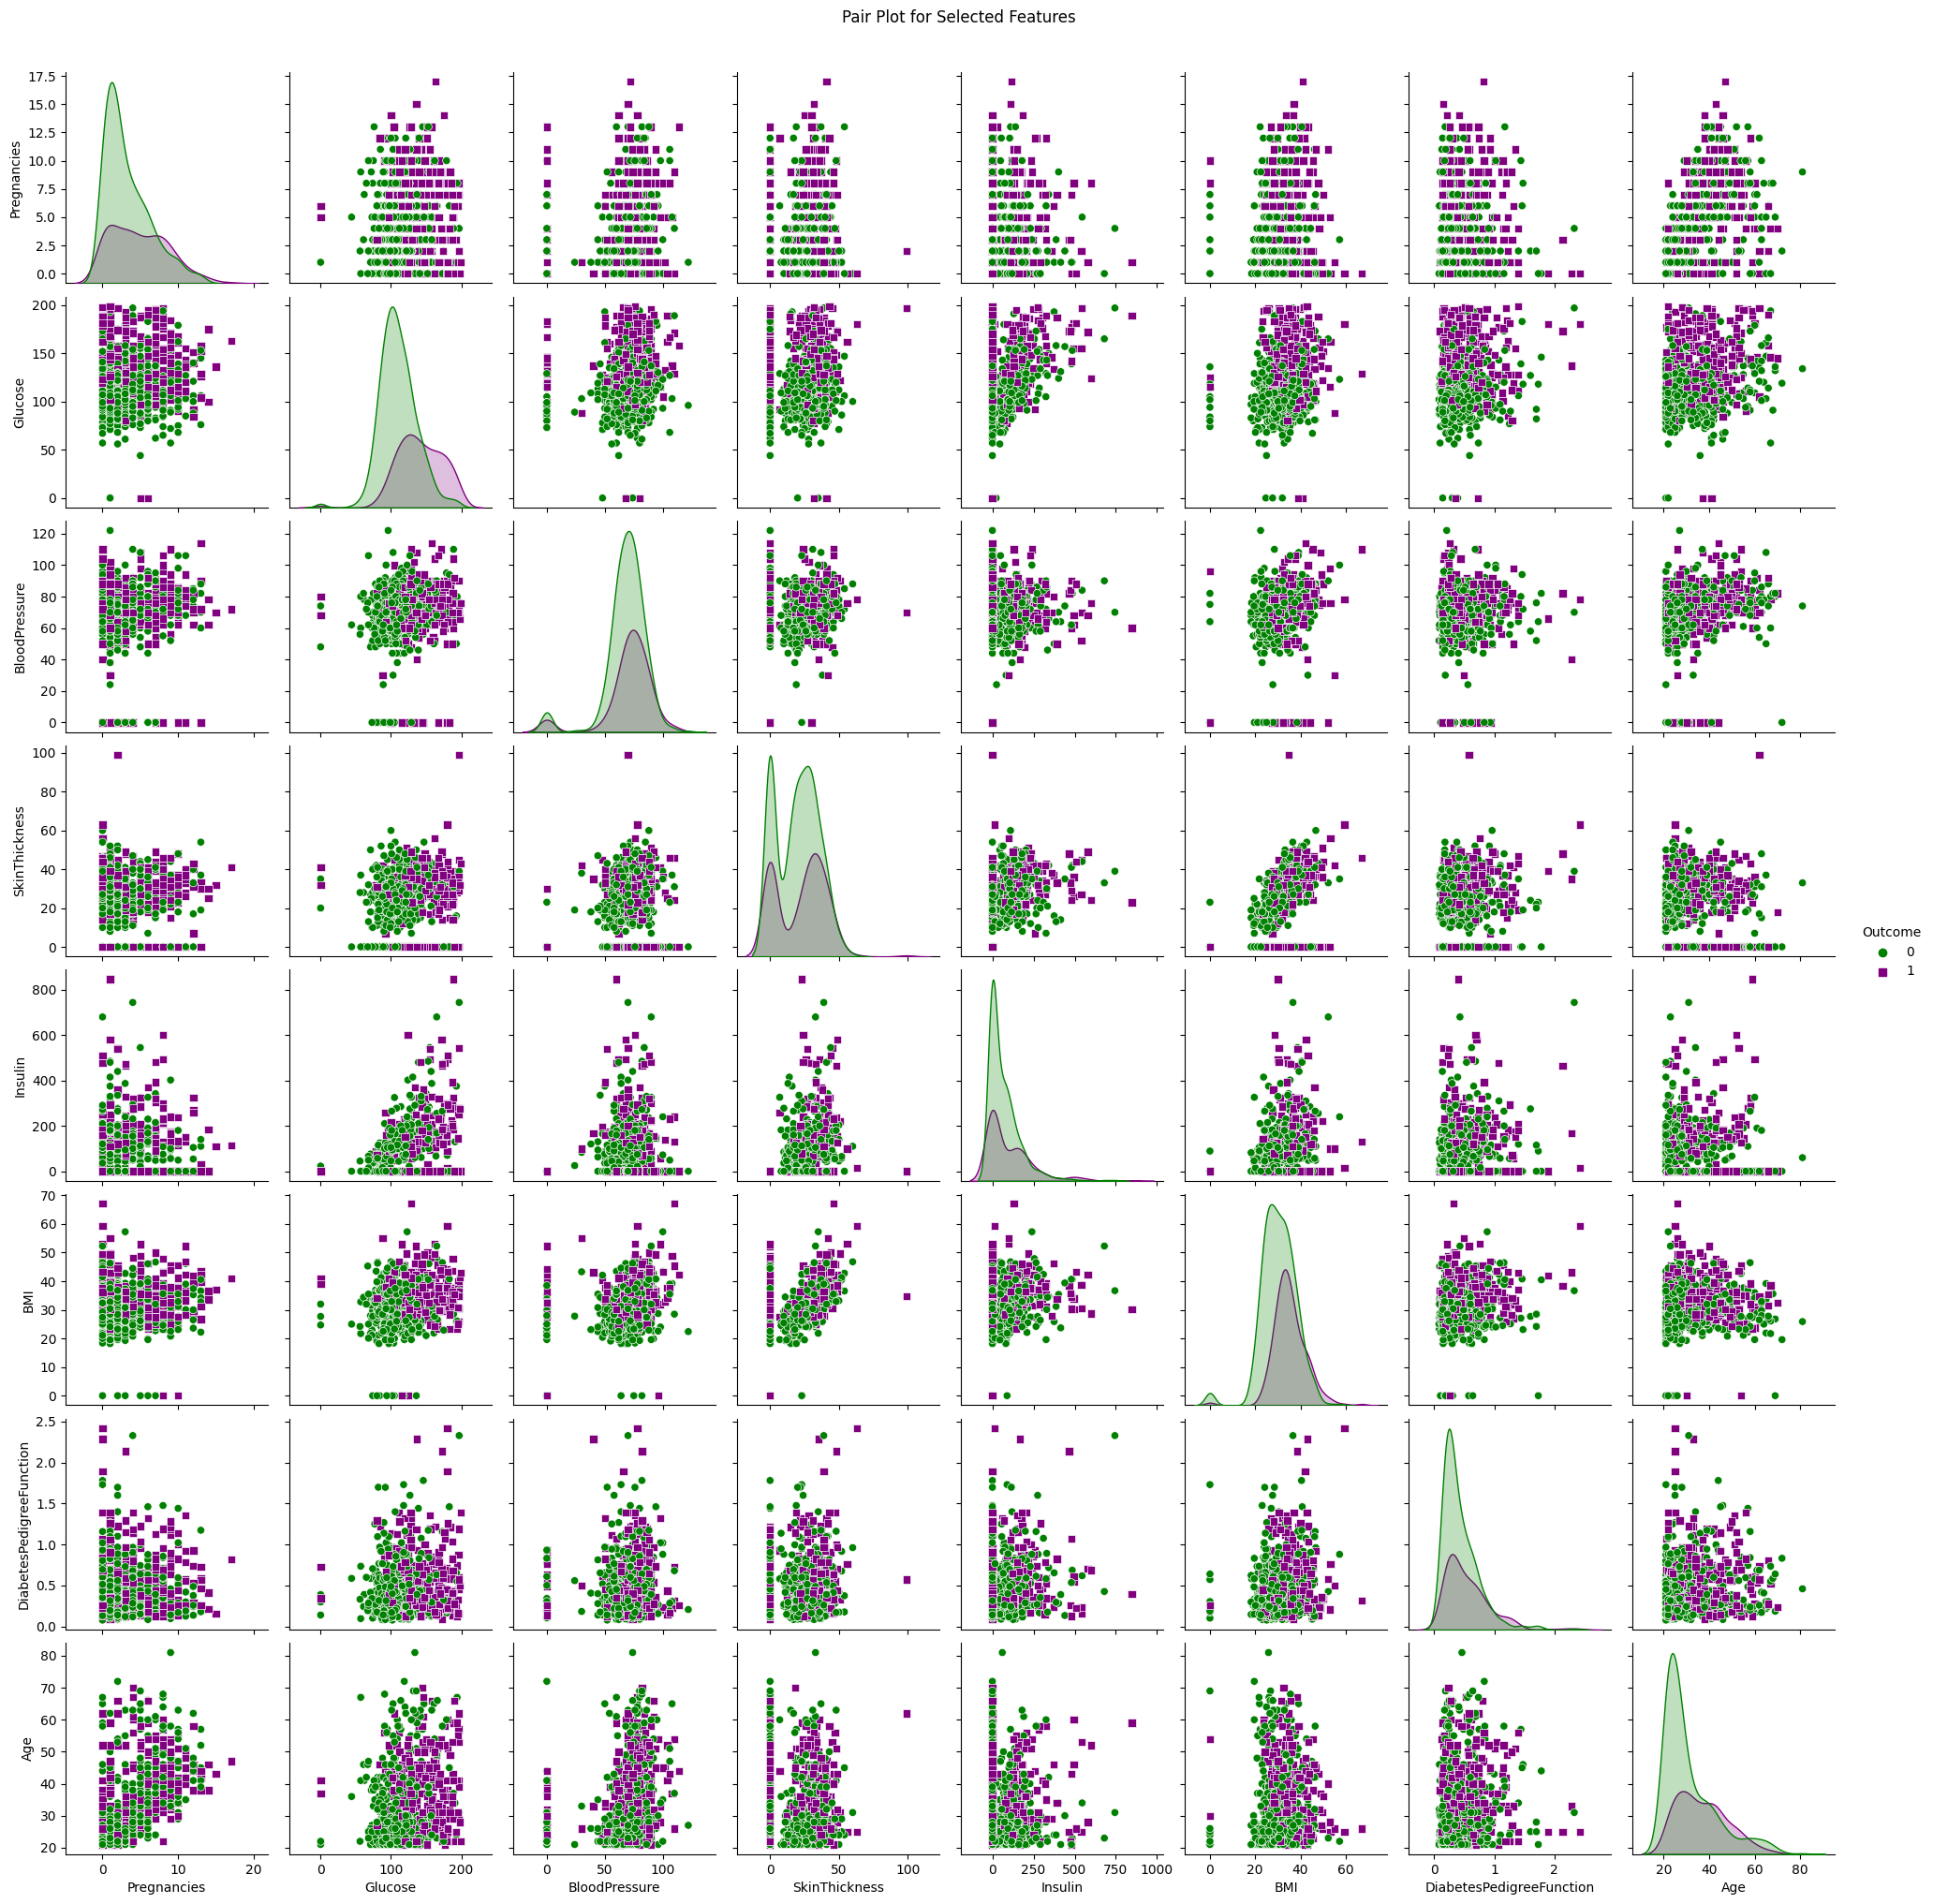

In [ ]:

# Pair plot for selected features using Seaborn
selected_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.pairplot(diabetes_dataset[selected_features], hue='Outcome', markers=['o', 's'], diag_kind='kde', palette={0: 'green', 1: 'purple'})
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.show()


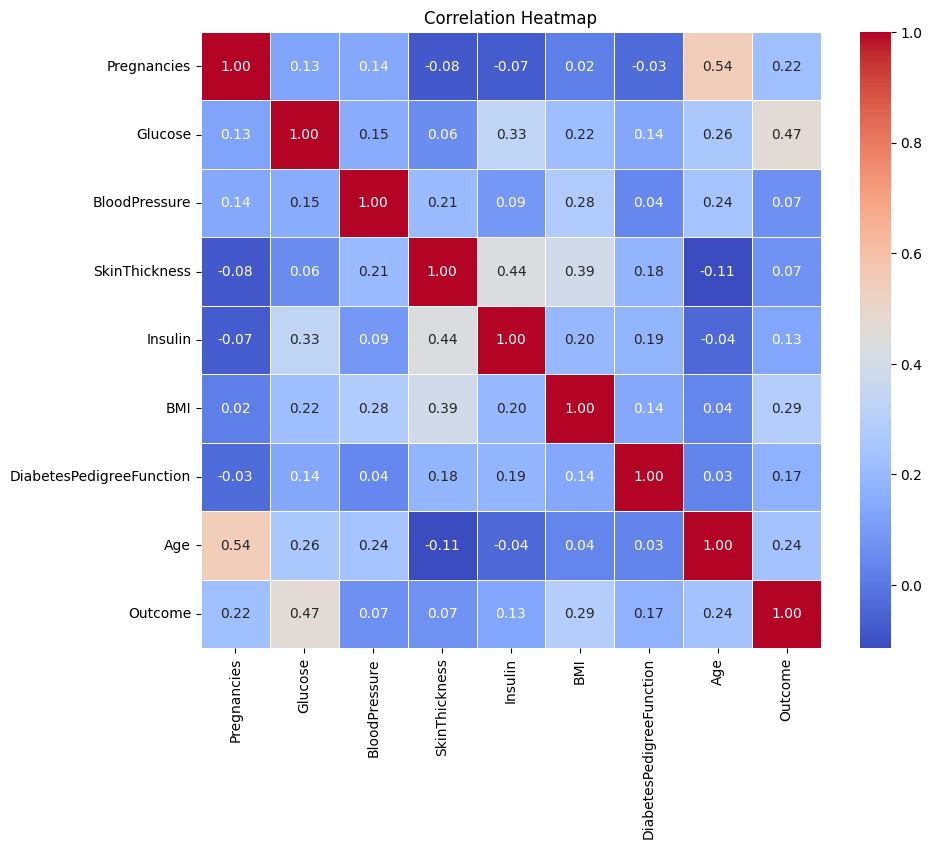

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#The intensity of the color indicates the strength and direction of the correlation.
#Positive correlations are represented by warmer colors (e.g., shades of red),
#While negative correlations are represented by cooler colors (e.g., shades of blue).
#For example, strong positive correlations (closer to 1) or negative correlations (closer to -1)
# between certain features can suggest potential dependencies in the data.
# This information is useful for feature selection and understanding which features might have redundant information.

 Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)




(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
# Initialize classifiers
svm_classifier = svm.SVC(kernel='linear')
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)



#The fit method is then used to train
# the SVM classifier on the training data (X_train and Y_train)
svm_classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# Training the Random Forest Model
rf_classifier.fit(X_train, Y_train)
X_train_prediction_rf = rf_classifier.predict(X_train)
X_test_prediction_rf = rf_classifier.predict(X_test)

# Train SVM
svm_classifier.fit(X_train, Y_train)
X_train_prediction_svm = svm_classifier.predict(X_train)
X_test_prediction_svm = svm_classifier.predict(X_test)

MODEL EVALUATION

Accuracy Score

In [ ]:
accuracy_scores = {
    'Algorithm': ['SVM', 'Random Forest'],
    'Training Accuracy': [accuracy_score(X_train_prediction_svm, Y_train), accuracy_score(X_train_prediction_rf, Y_train)],
    'Test Accuracy': [accuracy_score(X_test_prediction_svm, Y_test), accuracy_score(X_test_prediction_rf, Y_test)]
}
# Create a DataFrame
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the accuracy table
print(accuracy_df)

       Algorithm  Training Accuracy  Test Accuracy
0            SVM           0.786645       0.772727
1  Random Forest           1.000000       0.727273


In [ ]:
#Classification Report
print("Evaluation for SVM:\n")

print("Training Data Metrics:")
print("Classification Report:\n", classification_report(Y_train, X_train_prediction_svm))

print("\nTest Data Metrics:")
print("Classification Report:\n", classification_report(Y_test, X_test_prediction_svm))


Evaluation for SVM:

Training Data Metrics:
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.75      0.59      0.66       214

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614


Test Data Metrics:
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [ ]:
# Evaluation for Random Forest
print("\nEvaluation for Random Forest:\n")

print("Training Data Metrics:")
print("Classification Report:\n", classification_report(Y_train, X_train_prediction_rf))

print("\nTest Data Metrics:")
print("Classification Report:\n", classification_report(Y_test, X_test_prediction_rf))


Evaluation for Random Forest:

Training Data Metrics:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


Test Data Metrics:
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.65      0.48      0.55        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



'''Based on the provided information, the SVM model
seems to be a more robust choice for this particular problem.
The SVM model demonstrates good generalization to the test set and balanced performance in terms of precision and recall for both classes.
The Random Forest model, while performing exceptionally well on the training set, shows signs of overfitting and does not generalize as effectively to the test set.'''

In [ ]:
input_data = (2,130,76,15,150,23.5,0.354,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm_classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.54791859  0.28497518  0.35643175 -0.3472913   0.60954382 -1.07787161
  -0.35600042 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
